# InnoByte Services - Data Analyst Internship Project

## Problem Statement:
- Analyze and Provide Insights on Amazon Sales Report.

## Problem Description:
- The provided dataset contains information about sales transactions on Amazon, including details such as order ID, date, status, fulfilment method, sales channel, product category, size, quantity, amount, shipping details, and more. The objective is to conduct a comprehensive analysis of the data and extract actionable insights to support business decision-making. 

## Import libraries 

In [4]:
import pandas as pd
import numpy as np
import warnings
import re
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

## Read the dataset

In [5]:
df = pd.read_csv('Amazon Sale Report (1).csv')
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN


## Check No. Of Rows and Columns

In [6]:
df.shape

(128976, 21)

- There are 128976 rows and 21 columns.

## Data Checks to Perform 
- Check missing values
- Check Duplicated values
- Check Data type
- Check the number of unique values of each columns
- Check Statistics of Dataset
- Check various categories Present in the different Categories Columns

In [7]:
## check missing values
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

- There are many missing values in the dataset.
- Some Columns that have missing values are 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'fulfilled-by', 'New', 'PendingS'.

In [8]:
## check duplicated values
df.duplicated().sum()

168

- There are 168 duplicated records in the dataset.

In [9]:
## check the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

- There are 1 column that have boolean data type, 4 columns float data type, 2 columns integer data type and 14 columns string data type. 

In [10]:
## check number of unique values in each columns
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
New                        0
PendingS                   0
dtype: int64

In [11]:
## check the Statistical summary of dataset
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


- Index: Uniformly distributed from 0 to 128,974, indicating a sequential identifier.
- Qty (Quantity): Highly concentrated around the value 1, with occasional higher values up to 15, showing a skewed distribution towards lower quantities.
- Amount: Exhibits significant variability, with most values below 788 but some outliers reaching up to 5,584, indicating a right-skewed distribution.
- Ship Postal Code: Spans a wide range from 110,001 to 989,898, suggesting the dataset covers a broad geographic area.
- New and PendingS: Both columns have no data, indicating they might be empty or not processed properly.

## Data Cleaning

- The best Practice before to clean the dataset make a another copy of the dataset. Because If a mistake is made during the cleaning process, you can easily revert to the original dataset without having to reload or re-fetch the data.

In [12]:
df_copy = df.copy()

In [13]:
df_copy.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN


In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

- Firstly, remove the columns that have no data. 

In [15]:
df_copy.drop(['New', 'PendingS'], axis = 1, inplace = True)

In [16]:
df_copy.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


- Remove the index column also because they have no any use.

In [17]:
df_copy.drop('index', axis = 1, inplace = True)

In [18]:
df_copy.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


- Remove the duplicated data

In [19]:
##check the duplicated records
df_copy.duplicated().sum()

959

- After drop the some columns we achieve 959 records that have duplicate.

In [20]:
df_copy = df_copy.drop_duplicates(subset='Order ID', keep='first')

In [21]:
df_copy.duplicated().sum()

0

- There is no duplicated records.

In [22]:
df_copy.shape

(120229, 18)

- After removing the duplicated records there are 120229 rows and 18 columns.

## Finding Some errors and Remove it by Checking each Columns in the Dataset.

In [23]:
df_copy.Date.dtypes

dtype('O')

- The date column is object type. convert into datetime format.

In [24]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120229 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            120229 non-null  object        
 1   Date                120229 non-null  datetime64[ns]
 2   Status              120229 non-null  object        
 3   Fulfilment          120229 non-null  object        
 4   Sales Channel       120229 non-null  object        
 5   ship-service-level  120229 non-null  object        
 6   Category            120229 non-null  object        
 7   Size                120229 non-null  object        
 8   Courier Status      120229 non-null  object        
 9   Qty                 120229 non-null  int64         
 10  currency            112834 non-null  object        
 11  Amount              112834 non-null  float64       
 12  ship-city           120201 non-null  object        
 13  ship-state          120201 no

In [26]:
df_copy['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [27]:
df_copy['status'] = df_copy['Status'].str.split('-').str[0]
df_copy['order status'] = df_copy['Status'].str.split('-').str[1]

In [28]:
df_copy.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Cancelled,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Delivered to Buyer


In [29]:
df_copy['status'].unique()

array(['Cancelled', 'Shipped ', 'Shipped', 'Pending', 'Pending ',
       'Shipping'], dtype=object)

In [30]:
df_copy['order status'].unique()

array([nan, ' Delivered to Buyer', ' Returned to Seller',
       ' Rejected by Buyer', ' Lost in Transit', ' Out for Delivery',
       ' Returning to Seller', ' Picked Up', ' Waiting for Pick Up',
       ' Damaged'], dtype=object)

In [31]:
df_copy['order status'].isnull().sum()

90500

In [32]:
df_copy['order status'] = df_copy['order status'].replace(np.nan, "loading")

In [33]:
df_copy['order status'].unique()

array(['loading', ' Delivered to Buyer', ' Returned to Seller',
       ' Rejected by Buyer', ' Lost in Transit', ' Out for Delivery',
       ' Returning to Seller', ' Picked Up', ' Waiting for Pick Up',
       ' Damaged'], dtype=object)

In [34]:
df_copy['order status'].isnull().sum()

0

In [35]:
df_copy.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Cancelled,loading
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Delivered to Buyer


In [36]:
## handle the Fulfilment column
df_copy['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

- There is no any error in the Fulfilment column.

In [37]:
## handle the Sales Channel
df_copy['Sales Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

- There is one error in the 'Sales Channel' i.e '.in'.
- We have to remove the error

In [38]:
df_copy['Sales Channel'] = df_copy['Sales Channel'].replace('Amazon.in','Amazon')

In [39]:
df_copy['Sales Channel'].unique()

array(['Amazon', 'Non-Amazon'], dtype=object)

In [40]:
df_copy.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Cancelled,loading
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Delivered to Buyer


In [41]:
## handle ship-service-level
df_copy['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

- There is no errors in the 'ship-service-level' column.

In [42]:
## category column
df_copy['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

- There is no error in the 'Category' column.

In [43]:
## size column
df_copy['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

- There is no error in the 'Size' column.

In [44]:
## Courier Status
df_copy['Courier Status'].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

- There is no error in the 'Courier Status' column.

In [45]:
## Qty column
df_copy['Qty'].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4], dtype=int64)

- There is no error in the 'Qty' column.

In [46]:
## currency column
df_copy['currency'].unique()

array(['INR', nan], dtype=object)

- There is no error in the 'currency' column.

In [47]:
## ship-city column
np.set_printoptions(threshold=np.inf)

In [48]:
df_copy['ship-city'] = df_copy['ship-city'].str.upper()

In [49]:
def clean_text(text):
    if isinstance(text, str):
        # Remove special characters and numbers, keeping only letters
        return re.sub(r'[^A-Za-z\s]', '', text)
    else:
        return text  # Return the original value if it's not a string

In [50]:
df_copy['ship-city'] = df_copy['ship-city'].apply(clean_text)

In [51]:
df_copy['ship-city'].isnull().sum()

28

In [52]:
df_copy['ship-city'] = df_copy['ship-city'].replace(np.nan, "NA")

In [53]:
df_copy['ship-city'].isnull().sum()

0

In [54]:
df_copy['ship-state'] = df_copy['ship-state'].str.upper()

In [55]:
df_copy['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'RAJSHTHAN', 'NL', 'MIZORAM', 'NEW DELHI',
       'PUNJAB/MOHALI/ZIRAKPUR', 'RJ', 'ORISSA', 'LAKSHADWEEP', 'PB',
       'APO', 'AR', 'PONDICHERRY', 'RAJSTHAN'], dtype=object)

In [56]:
df_copy['ship-state'] = df_copy['ship-state'].replace("NA","NAGALAND")
df_copy['ship-state'] = df_copy['ship-state'].replace("NL","NAGALAND")
df_copy['ship-state'] = df_copy['ship-state'].replace("RJ","RAJSTHAN")
df_copy['ship-state'] = df_copy['ship-state'].replace("PB","PUNJAB")
df_copy['ship-state'] = df_copy['ship-state'].replace("APO","ANDHRA PRADESH")
df_copy['ship-state'] = df_copy['ship-state'].replace("AR","ARUNACHAL PRADESH")
df_copy['ship-state'] = df_copy['ship-state'].replace("DELHI","NEW DELHI")
df_copy['ship-state'] = df_copy['ship-state'].replace("RAJSTHAN","RAJASTHAN")
df_copy['ship-state'] = df_copy['ship-state'].replace("RAJSHTHAN","RAJASTHAN")
df_copy['ship-state'] = df_copy['ship-state'].replace("PUNJAB/MOHALI/ZIRAKPUR","PUNJAB")

In [57]:
df_copy['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'NEW DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'MIZORAM', 'ORISSA', 'LAKSHADWEEP', 'PONDICHERRY'], dtype=object)

In [58]:
df_copy['ship-state'].isnull().sum()

28

In [59]:
df_copy['ship-state'] = df_copy['ship-state'].replace(np.nan,"NA")

In [60]:
df_copy['ship-state'].isnull().sum()

0

In [61]:
## ship-country
df_copy['ship-country'].unique()

array(['IN', nan], dtype=object)

In [62]:
df_copy['ship-country'] = df_copy['ship-country'].map({'IN': 'INDIA', np.nan : 'INDIA'})

In [63]:
df_copy['ship-country'].unique()

array(['INDIA'], dtype=object)

In [64]:
## B2B
df_copy['B2B'].unique()

array([False,  True])

In [65]:
## fulfilled-by
df_copy['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [66]:
df_copy['fulfilled-by'].isnull().sum()

83906

In [67]:
df_copy['fulfilled-by'] = df_copy['fulfilled-by'].replace(np.nan, "NA")

In [68]:
df_copy['fulfilled-by'].isnull().sum()

0

In [69]:
df_copy['currency'].unique()

array(['INR', nan], dtype=object)

In [70]:
df_copy['currency'] = df_copy['currency'].replace(np.nan,"INR")

In [71]:
df_copy['currency'].unique()

array(['INR'], dtype=object)

In [72]:
df_copy.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7395
ship-city                0
ship-state               0
ship-postal-code        28
ship-country             0
B2B                      0
fulfilled-by             0
status                   0
order status             0
dtype: int64

In [73]:
df_copy['ship-postal-code'] = df_copy['ship-postal-code'].replace(np.nan,'None')

In [74]:
df_copy.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7395
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
B2B                      0
fulfilled-by             0
status                   0
order status             0
dtype: int64

In [75]:
df_copy.dropna(inplace=True)

In [76]:
df_copy.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
status                0
order status          0
dtype: int64

- There is no null values in the data

## Explore More Data

In [77]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112834 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            112834 non-null  object        
 1   Date                112834 non-null  datetime64[ns]
 2   Status              112834 non-null  object        
 3   Fulfilment          112834 non-null  object        
 4   Sales Channel       112834 non-null  object        
 5   ship-service-level  112834 non-null  object        
 6   Category            112834 non-null  object        
 7   Size                112834 non-null  object        
 8   Courier Status      112834 non-null  object        
 9   Qty                 112834 non-null  int64         
 10  currency            112834 non-null  object        
 11  Amount              112834 non-null  float64       
 12  ship-city           112834 non-null  object        
 13  ship-state          112834 no

In [78]:
df_copy.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,INDIA,True,NA,Shipped,loading
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,INDIA,False,Easy Ship,Cancelled,loading
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,INDIA,False,NA,Shipped,loading


In [79]:
## create a new column total amount 
df_copy['Total Amount'] = df_copy['Qty'] * df_copy['Amount']

In [80]:
df_copy.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status,Total Amount
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,...,406.00,BENGALURU,KARNATAKA,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,INDIA,True,NA,Shipped,loading,329.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,...,574.00,CHENNAI,TAMIL NADU,600073.0,INDIA,False,NA,Shipped,loading,574.0


In [81]:
df_copy.shape

(112834, 21)

In [82]:
df_copy[(df_copy['Qty'] == 0) & (df_copy['Amount'] != 0)].head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status,Total Amount
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,M,On the Way,0,...,570.48,PUNE,MAHARASHTRA,411044.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
83,404-6522553-9345930,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,M,On the Way,0,...,1105.36,DEHRADUN,UTTARAKHAND,248001.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
178,171-1224053-5752314,2022-04-30,Cancelled,Merchant,Amazon,Standard,Trousers,L,On the Way,0,...,463.81,BENGALURU,KARNATAKA,560087.0,INDIA,False,Easy Ship,Cancelled,loading,0.0


In [83]:
## change column name
change_column = { 'ship-service-level' : 'Service',
                 'ship-city' : 'City',
                 'ship-state' : 'State',
                 'ship-postal-code' : 'Postal Code',
                 'ship-country' : 'Country'
}

In [84]:
df_copy = df_copy.rename(columns= change_column)

In [85]:
df_copy.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,...,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,...,406.00,BENGALURU,KARNATAKA,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,INDIA,True,NA,Shipped,loading,329.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,...,574.00,CHENNAI,TAMIL NADU,600073.0,INDIA,False,NA,Shipped,loading,574.0


In [86]:
## drop Status Column
df_copy.drop('Status', axis = 1, inplace = True)

In [87]:
df_copy.head(5)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0
2,404-0687676-7273146,2022-04-30,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,INDIA,True,NA,Shipped,loading,329.0
3,403-9615377-8133951,2022-04-30,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
4,407-1069790-7240320,2022-04-30,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,INDIA,False,NA,Shipped,loading,574.0


In [88]:
## seperate year, month, day
df_copy['Day'] = df_copy['Date'].dt.day
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Year'] = df_copy['Date'].dt.year

In [89]:
df_copy.head(5)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,...,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,...,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0,30,4,2022
2,404-0687676-7273146,2022-04-30,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,...,410210.0,INDIA,True,NA,Shipped,loading,329.0,30,4,2022
3,403-9615377-8133951,2022-04-30,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,...,605008.0,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022
4,407-1069790-7240320,2022-04-30,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,INR,...,600073.0,INDIA,False,NA,Shipped,loading,574.0,30,4,2022


In [90]:
## month column
df_copy['Month'].unique()

array([4, 3, 5, 6], dtype=int64)

In [91]:
## year column
df_copy['Year'].unique()

array([2022], dtype=int64)

In [92]:
## extract month name from date column
df_copy['month_name'] = df_copy['Date'].dt.month_name()

In [93]:
df_copy.head(5)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year,month_name
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,...,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022,April
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,...,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0,30,4,2022,April
2,404-0687676-7273146,2022-04-30,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,...,INDIA,True,NA,Shipped,loading,329.0,30,4,2022,April
3,403-9615377-8133951,2022-04-30,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,...,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022,April
4,407-1069790-7240320,2022-04-30,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,INR,...,INDIA,False,NA,Shipped,loading,574.0,30,4,2022,April


In [94]:
## check one last time the dataset before save the data file
df_copy.duplicated().sum()

0

In [95]:
df_copy.isnull().sum()

Order ID          0
Date              0
Fulfilment        0
Sales Channel     0
Service           0
Category          0
Size              0
Courier Status    0
Qty               0
currency          0
Amount            0
City              0
State             0
Postal Code       0
Country           0
B2B               0
fulfilled-by      0
status            0
order status      0
Total Amount      0
Day               0
Month             0
Year              0
month_name        0
dtype: int64

In [96]:
df_copy.head(4)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year,month_name
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,...,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022,April
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,...,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0,30,4,2022,April
2,404-0687676-7273146,2022-04-30,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,...,INDIA,True,NA,Shipped,loading,329.0,30,4,2022,April
3,403-9615377-8133951,2022-04-30,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,...,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022,April


## EDA And Visualization

- Perform data analysis and do visualization

## 1. Sales Overview: Understand the overall sales performance, trends, and patterns over time.

In [97]:
## preprocess the data
df_copy = df_copy.sort_values(by='Date')

In [98]:
df_copy.head(5)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year,month_name
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,...,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0,31,3,2022,March
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,...,INDIA,False,NA,Shipped,loading,688.0,31,3,2022,March
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,...,INDIA,False,NA,Shipped,loading,354.0,31,3,2022,March
48999,404-1415044-3213110,2022-03-31,Amazon,Amazon,Expedited,T-shirt,3XL,Shipped,1,INR,...,INDIA,False,NA,Shipped,loading,698.0,31,3,2022,March
49000,171-3572716-7638764,2022-03-31,Merchant,Amazon,Standard,Shirt,XXL,Shipped,1,INR,...,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,248.0,31,3,2022,March


In [99]:
df_copy = df_copy.drop(['Day', 'Month', 'Year', 'month_name'], axis = 1)

In [100]:
df_copy.head(4)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,Shipped,loading,688.0
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,354.0,DELHI,NEW DELHI,110016.0,INDIA,False,NA,Shipped,loading,354.0
48999,404-1415044-3213110,2022-03-31,Amazon,Amazon,Expedited,T-shirt,3XL,Shipped,1,INR,698.0,SIKAR,RAJASTHAN,332001.0,INDIA,False,NA,Shipped,loading,698.0


In [101]:
df_copy = df_copy.rename(columns={'Total Amount' : 'Total Sales'})

- Aggregate the sales data to analyze trends over different time periods like daily, monthly, quarterly, or yearly.

In [102]:
monthly_sales = df_copy.resample('M', on = 'Date').sum()

In [103]:
monthly_sales

,Qty,Amount,B2B,Total Sales
Date,,,,
2022-03-31,144,95971.85,0,92549.0
2022-04-30,41035,26867098.20,298,25886087.0
2022-05-31,35403,24472622.32,250,23619231.0
2022-06-30,31888,21887776.50,220,21270794.0


## Insights and Observations
- March 2022: 0.093 million in total sales, minimal activity.
- April 2022: 25.89 million in total sales, peak performance.
- May 2022: 23.62 million in total sales, slight decline.
- June 2022: 21.27 million in total sales, continued downward trend.
- Overall, sales peaked in April and then gradually declined over the following months.

In [104]:
yearly_sales = df_copy.resample('Y', on = 'Date').sum()

In [105]:
yearly_sales

,Qty,Amount,B2B,Total Sales
Date,,,,
2022-12-31,108470,73323468.87,768,70868661.0


## Insights and Observations
- year 2022: 70.87 million in total sales, with 108,470 units sold. The sales include 0.0008 million in B2B transactions.

## Visualize Sales Trends

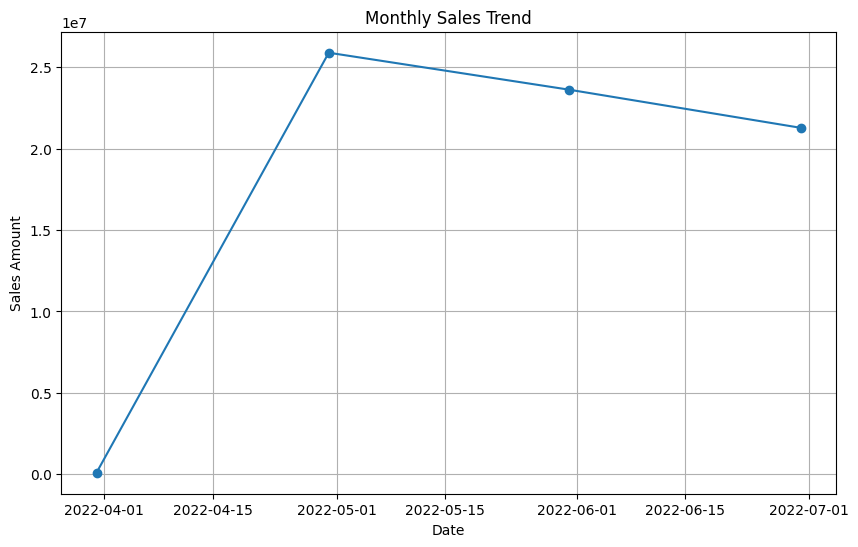

In [106]:
plt.figure(figsize = (10,6))
plt.plot(monthly_sales.index, monthly_sales['Total Sales'], marker = 'o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

- Overall, sales peaked in April and then gradually declined over the following months.

## Analyze Sales by Categories

In [107]:
## Group Sales by product category
Category_sales = df_copy.groupby(['Category', pd.Grouper(key = 'Date', freq= 'M')])['Total Sales'].sum().unstack()

In [108]:
Category_sales

Date,2022-03-31,2022-04-30,2022-05-31,2022-06-30
Category,,,,
Blazzer,5479.0,2647107.0,3930309.0,3545296.0
Perfume,1099.0,220401.0,255662.0,226770.0
Shirt,30343.0,7058269.0,5957438.0,5942321.0
Shoes,NaN,41128.0,43218.0,23993.0
Socks,NaN,58656.0,41206.0,31842.0
T-shirt,50837.0,13990667.0,11416137.0,10002619.0
Trousers,4511.0,1686374.0,1830115.0,1401518.0
Wallet,280.0,183485.0,145146.0,96130.0
Watch,NaN,NaN,NaN,305.0


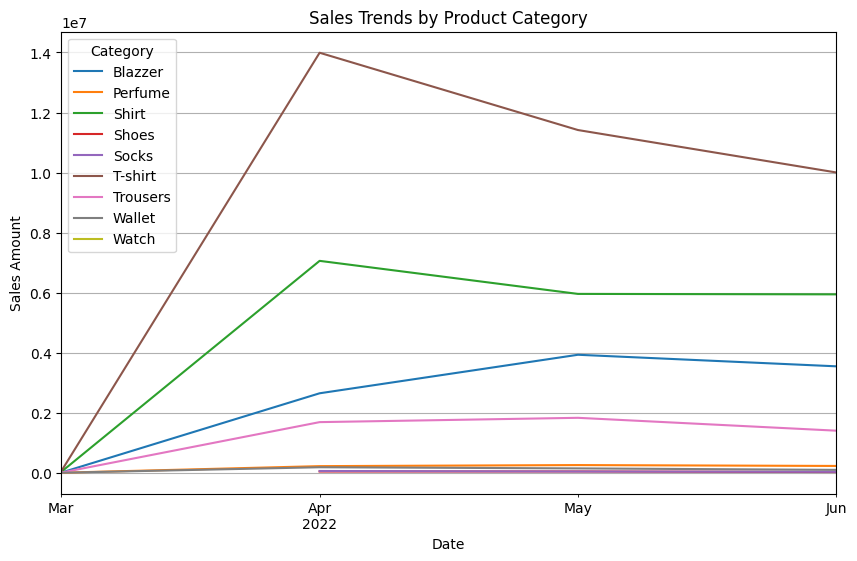

In [109]:
# Plotting sales trends by category
Category_sales.T.plot(kind='line', figsize=(10, 6))
plt.title('Sales Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

## Insights and Observations
- T-shirts and Shirts consistently generated the highest sales, with T-shirts peaking in April.
- Blazzer and Trousers also saw significant sales but with more fluctuation.
- Perfume, Shoes, Socks, Wallet, and Watch had lower sales overall, with some categories like Shoes and Socks having no sales in March.

## 2. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular products. 

- Analyzing Distribution of product categories

In [110]:
category_distribution = df_copy['Category'].value_counts()

In [111]:
category_distribution

T-shirt     44052
Shirt       42888
Blazzer     13938
Trousers     9572
Perfume      1017
Wallet        846
Socks         386
Shoes         134
Watch           1
Name: Category, dtype: int64

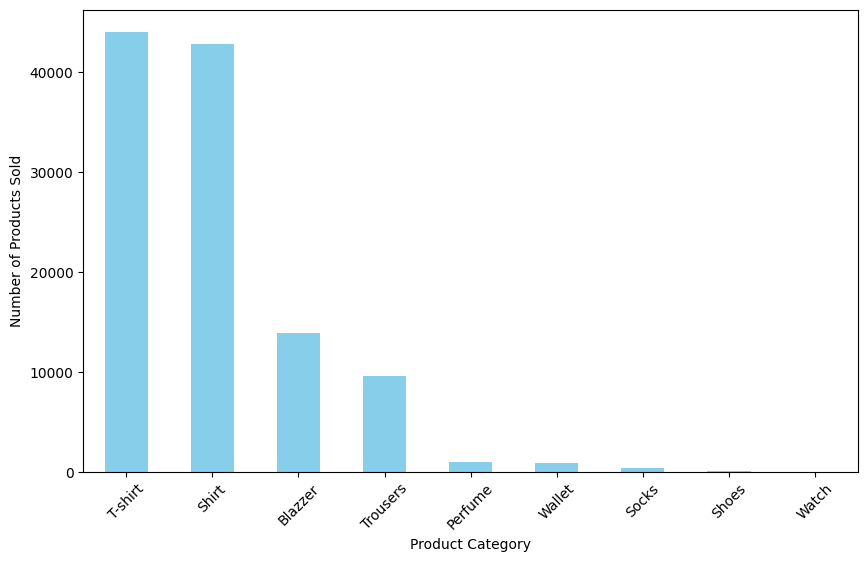

In [112]:
## plotting the distribution of product category
plt.figure(figsize = (10,6))
category_distribution.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

## Insights and Observations
- T-shirts and Shirts are the top-selling categories, with T-shirts leading in quantity sold.
- Blazzer and Trousers follow, with significantly lower quantities compared to T-shirts and Shirts.
- Perfume and Wallet have modest sales, while Socks, Shoes, and Watch have very low quantities sold.

- Analyze Distribution of Product Sizes

In [113]:
size_distribution = df_copy['Size'].value_counts()

In [114]:
size_distribution

M       19731
L       19072
XL      18146
XXL     15595
S       14647
3XL     12717
XS       9418
Free     1998
6XL       643
5XL       496
4XL       371
Name: Size, dtype: int64

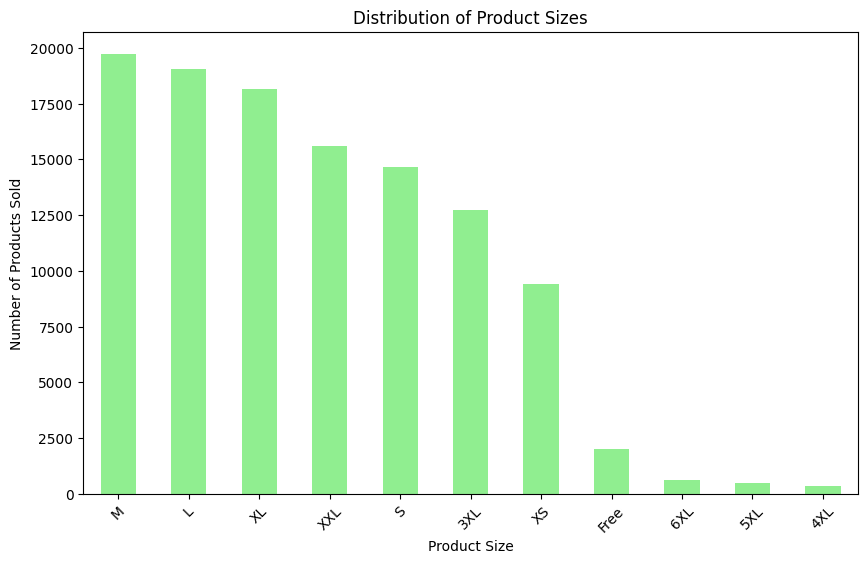

In [115]:
## plotting the size distribution
plt.figure(figsize = (10,6))
size_distribution.plot(kind = 'bar' , color = 'lightgreen' )
plt.title('Distribution of Product Sizes')
plt.xlabel('Product Size')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

## Insights and Observation
- Medium (M) and Large (L) are the most popular sizes, with nearly equal high quantities sold.
- Extra Large (XL) and Double Extra Large (XXL) follow, showing strong sales.
- Small (S) and Triple Extra Large (3XL) also have substantial quantities sold.
- Extra Small (XS) and Free Size have lower sales compared to the other sizes.
- 6XL, 5XL, and 4XL are the least sold sizes, with significantly lower quantities.

- Analyze Quantities sold by product category

In [116]:
quantity_by_category = df_copy.groupby('Category')['Qty'].sum().sort_values(ascending = False)

In [117]:
quantity_by_category

Category
T-shirt     42364
Shirt       41290
Blazzer     13208
Trousers     9320
Perfume       979
Wallet        811
Socks         367
Shoes         130
Watch           1
Name: Qty, dtype: int64

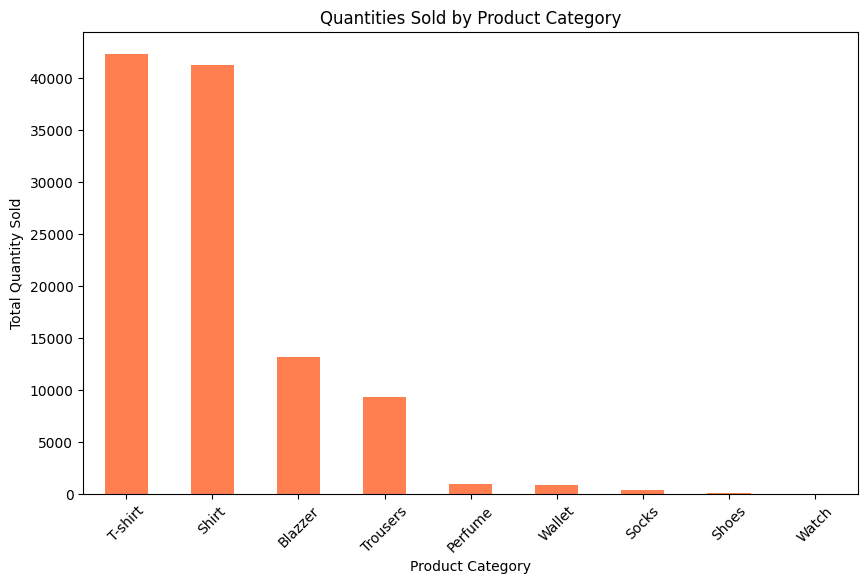

In [118]:
## plotting quantity sold by product category
plt.figure(figsize = (10,6))
quantity_by_category.plot(kind = 'bar', color = 'coral')
plt.title('Quantities Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45)
plt.show()

## Insights and Observation
- T-shirts and Shirts are the top-selling categories, with T-shirts leading in quantity sold.
- Blazzer follows, with a significantly lower quantity compared to T-shirts and Shirts.
- Trousers also show a notable amount of sales.
- Perfume and Wallet have moderate quantities sold.
- Socks and Shoes have low sales, with Shoes having the least quantity sold.
- Watch has minimal sales with only 1 unit sold.

- Analyze Quantities Sold by Product Size

In [119]:
quantity_by_size = df_copy.groupby('Size')['Qty'].sum().sort_values(ascending = False)

In [120]:
quantity_by_size

Size
M       18922
L       18325
XL      17393
XXL     15083
S       14048
3XL     12234
XS       9076
Free     1921
6XL       624
5XL       483
4XL       361
Name: Qty, dtype: int64

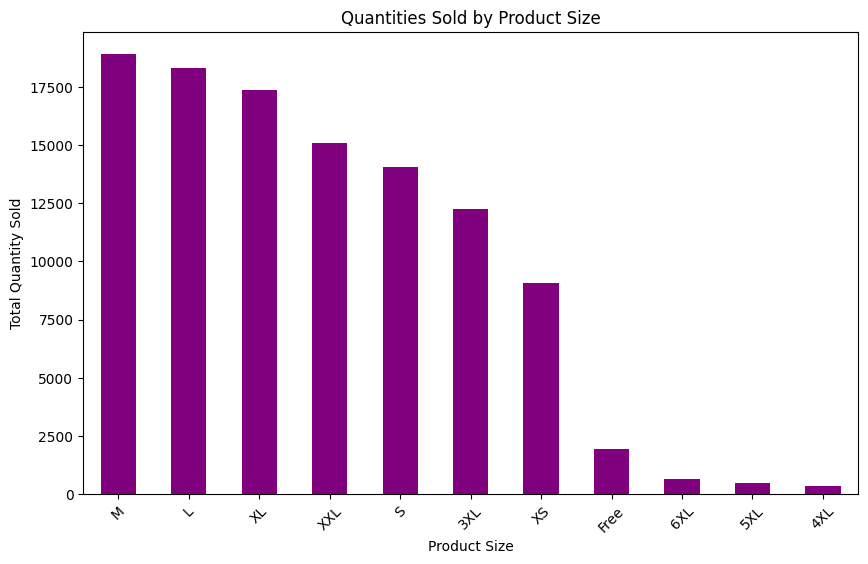

In [121]:
## plotting the quantities sold by product size
plt.figure(figsize = (10,6))
quantity_by_size.plot(kind = 'bar', color = 'purple')
plt.title('Quantities Sold by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45)
plt.show()

## Insights and Observations
- Medium (M) and Large (L) sizes are the most popular, with Medium slightly ahead in quantity sold.
- Extra Large (XL) and Double Extra Large (XXL) follow, with substantial sales.
- Small (S) and Triple Extra Large (3XL) have strong sales, though less than the larger sizes.
- Extra Small (XS) and Free Size have lower sales volumes.
- 6XL, 5XL, and 4XL are the least sold sizes, with significantly fewer units sold.

- Identify the most Popular Products

In [122]:
popular_products = df_copy.groupby(['Category', 'Size'])['Qty'].sum().sort_values(ascending = False)
popular_products.head(10) ## Top Products

Category  Size
T-shirt   M       7911
Shirt     L       7358
          XL      7223
          M       7142
T-shirt   L       6938
          XL      6466
Shirt     XXL     6368
T-shirt   S       6293
          XXL     5210
          3XL     4852
Name: Qty, dtype: int64

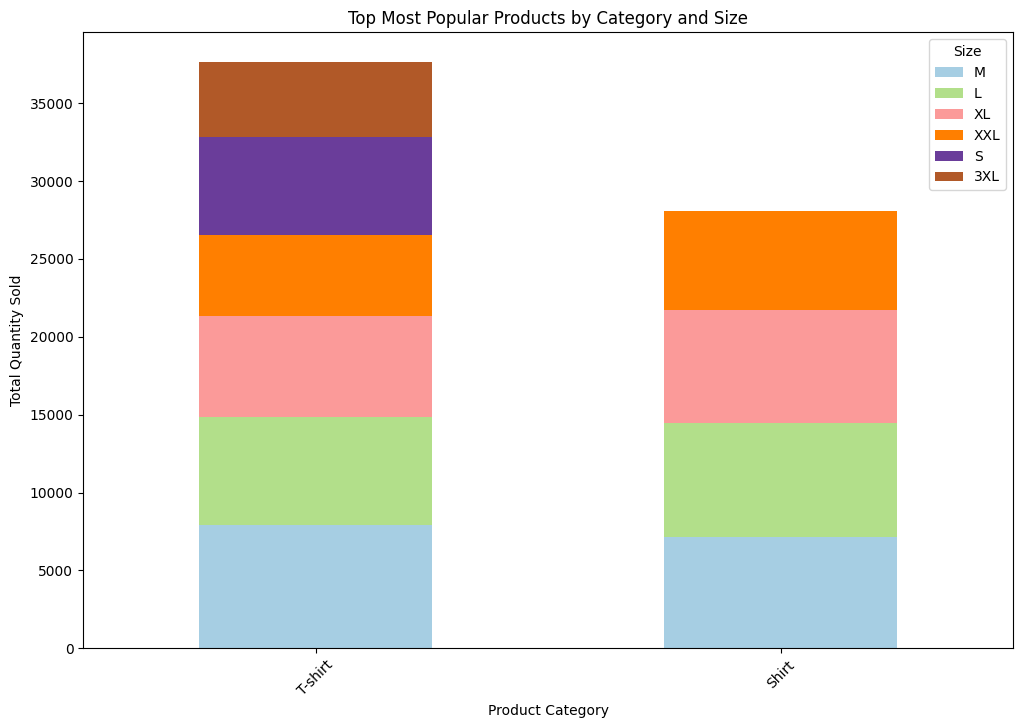

In [123]:
## visualize top popular Products
popular_products.head(10).unstack().plot(kind = 'bar', stacked = True, figsize = (12,8), colormap = 'Paired' )
plt.title('Top Most Popular Products by Category and Size')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45)
plt.show()

## Insights and Observations
- T-shirts are sold in all sizes, with Medium and Large being the top-selling sizes.
- Shirts also have substantial sales across multiple sizes, with Large and Extra Large leading in quantity sold.
- Both T-shirts and Shirts show strong performance in sizes M and L, while T-shirts have notable sales in Small and XXL as well.

## Correlation Trends

In [124]:
correlation_matrix = df_copy.corr()

In [125]:
correlation_matrix

,Qty,Amount,B2B,Total Sales
Qty,1.000000,0.056792,0.015154,0.488467
Amount,0.056792,1.000000,0.015862,0.849273
B2B,0.015154,0.015862,1.000000,0.026812
Total Sales,0.488467,0.849273,0.026812,1.000000


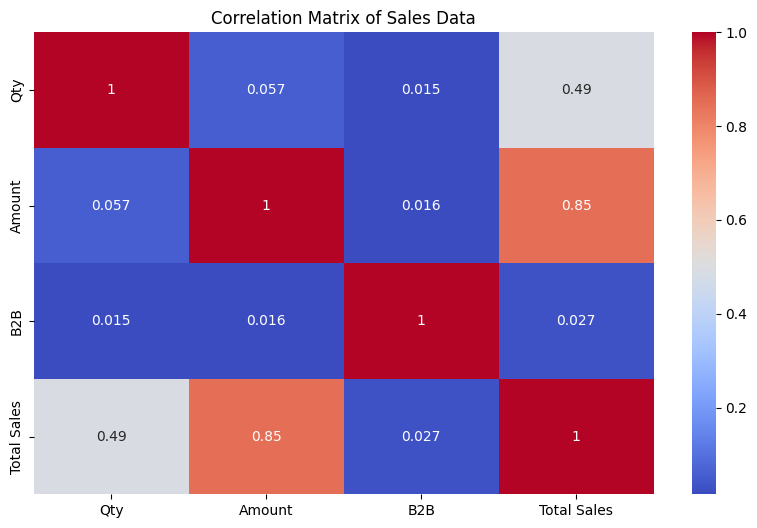

In [126]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sales Data')
plt.show()

## Insights and Observation
- Total Sales and Amount have the strongest positive correlation, indicating that the total amount generated is closely related to Total Sales.
- Quantity Sold has a moderate correlation with Total Sales, suggesting that higher quantities tend to drive higher total sales.
- B2B Sales have very weak correlations with the other variables, indicating that B2B transactions have minimal impact on the overall metrics in this dataset.

## 3. Fulﬁllment Analysis: Investigate the fulﬁllment methods used and their eﬀectiveness in delivering orders.

- Analyze Fulfillment methods Distribution 

In [127]:
fulfillment_distribution = df_copy['Fulfilment'].value_counts()

In [128]:
fulfillment_distribution

Amazon      78164
Merchant    34670
Name: Fulfilment, dtype: int64

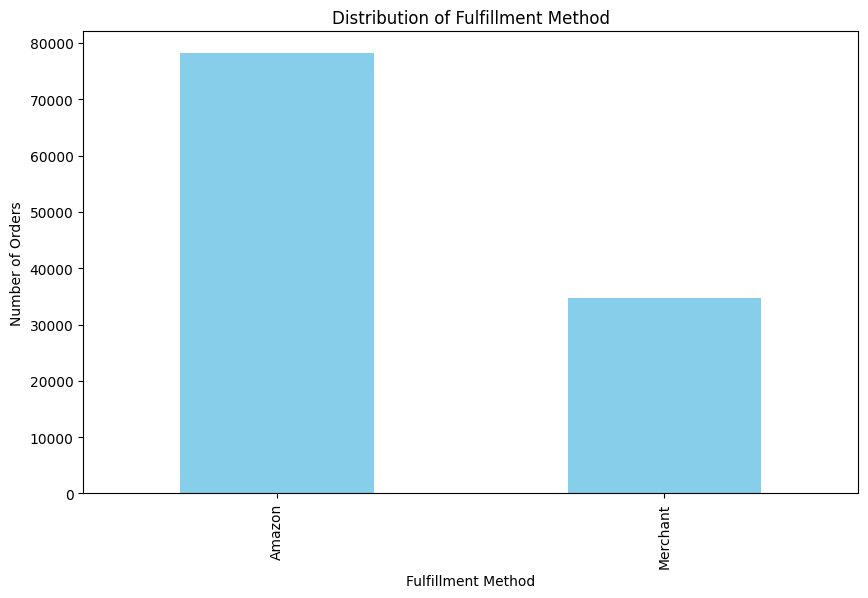

In [129]:
## plotting the fulfillment distribution
plt.figure(figsize = (10,6))
fulfillment_distribution.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribution of Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()

## Insights and Observation
- Amazon is the dominant fulfillment channel, with significantly higher sales compared to Merchant.
- Merchant fulfillment accounts for a smaller portion of the total sales, indicating that Amazon is the primary channel for these sales.

In [130]:
df_copy.head(3)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Sales
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,Shipped,loading,688.0
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,354.0,DELHI,NEW DELHI,110016.0,INDIA,False,NA,Shipped,loading,354.0


In [131]:
df_copy['Courier Status'].unique()

array(['Shipped', 'On the Way', 'Unshipped'], dtype=object)

In [132]:
df_copy['status'].unique()

array(['Shipped ', 'Shipped', 'Cancelled', 'Pending', 'Pending '],
      dtype=object)

In [133]:
df_copy['order status'].unique()

array([' Delivered to Buyer', 'loading', ' Returned to Seller',
       ' Rejected by Buyer', ' Picked Up', ' Returning to Seller',
       ' Out for Delivery', ' Lost in Transit', ' Damaged',
       ' Waiting for Pick Up'], dtype=object)

In [134]:
df_copy = df_copy.rename(columns= {'status': 'Pre order status', 'order status': 'Post order status'})

In [135]:
df_copy.head(2)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,Pre order status,Post order status,Total Sales
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,Shipped,loading,688.0


In [136]:
df_copy = df_copy.rename(columns = {'Post order status': 'order status'})
df_copy = df_copy.drop('Pre order status', axis = 1)

- Analyze service distribution

In [137]:
service_distribution = df_copy['Service'].value_counts()

In [138]:
service_distribution

Expedited    77251
Standard     35583
Name: Service, dtype: int64

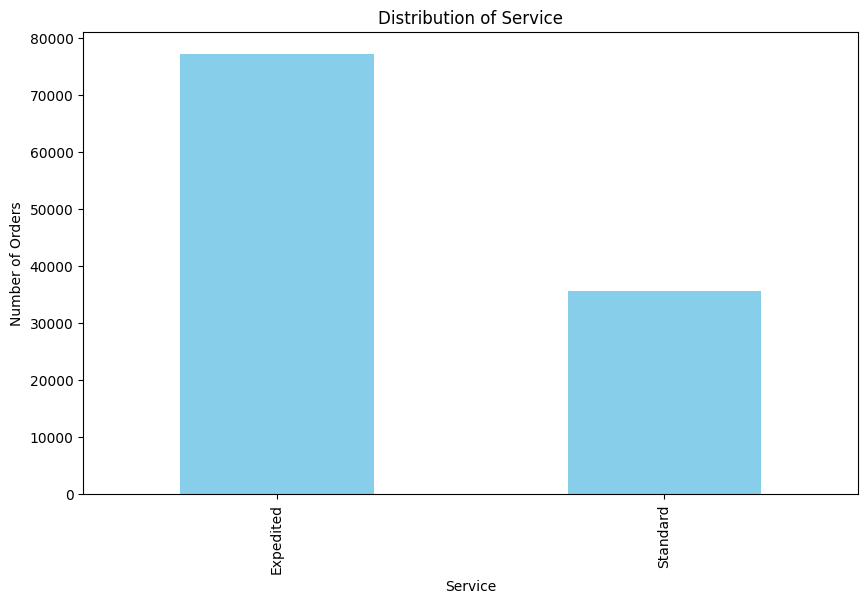

In [139]:
## plot service distribution
plt.figure(figsize = (10,6))
service_distribution.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribution of Service')
plt.xlabel('Service')
plt.ylabel('Number of Orders')
plt.show()

## Insights and Observation
- Expedited service is the preferred choice, with a significantly higher number of units fulfilled compared to Standard service.
- Standard service accounts for a smaller portion of the total sales, indicating that expedited delivery is more commonly used or preferred.

- Analyze Courier Status Distribution

In [140]:
courier_status_distribution = df_copy['Courier Status'].value_counts()

In [141]:
courier_status_distribution

Shipped       102049
Unshipped       6058
On the Way      4727
Name: Courier Status, dtype: int64

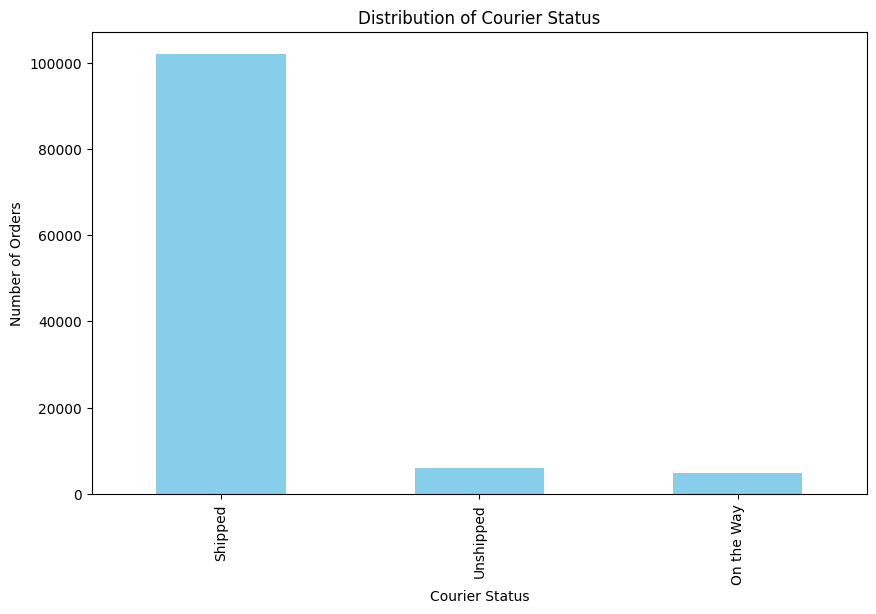

In [142]:
## plotting the courier status distribution
plt.figure(figsize = (10,6))
courier_status_distribution.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribution of Courier Status')
plt.xlabel('Courier Status')
plt.ylabel('Number of Orders')
plt.show()

## Insights and Observations
- Shipped is the predominant status, with a significantly higher number of units compared to Unshipped and On the Way.
- Unshipped and On the Way have much lower quantities, indicating that most of the orders have already been shipped.

- Order Status Distribution

In [143]:
order_status_distribution = df_copy['order status'].value_counts()

In [144]:
order_status_distribution

loading                 83110
 Delivered to Buyer     26517
 Returned to Seller      1849
 Picked Up                918
 Waiting for Pick Up      262
 Returning to Seller      130
 Out for Delivery          32
 Rejected by Buyer         11
 Lost in Transit            4
 Damaged                    1
Name: order status, dtype: int64

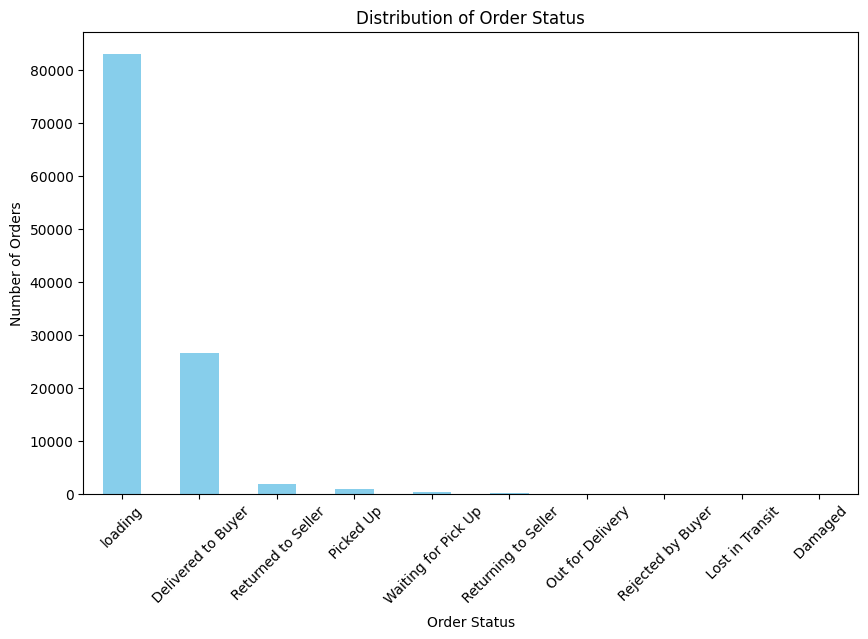

In [145]:
## plotting the pre order status distribution
plt.figure(figsize = (10,6))
order_status_distribution.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

## Insights and Observation
- Loading has the highest quantity, indicating that a large number of orders are still in the process of being prepared or shipped.
- Delivered to Buyer shows a significant number of completed transactions.
- Returned to Seller and Picked Up have relatively small quantities compared to the other statuses.
- Waiting for Pick Up, Returning to Seller, and other statuses such as Out for Delivery, Rejected by Buyer, Lost in Transit, and Damaged have minimal quantities, indicating less frequent occurrences.

### Analyze Delivery Effectiveness

- On Time Delivery Rate

In [146]:
df_copy.head(4)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,order status,Total Sales
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,loading,688.0
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,354.0,DELHI,NEW DELHI,110016.0,INDIA,False,NA,loading,354.0
48999,404-1415044-3213110,2022-03-31,Amazon,Amazon,Expedited,T-shirt,3XL,Shipped,1,INR,698.0,SIKAR,RAJASTHAN,332001.0,INDIA,False,NA,loading,698.0


In [147]:
df_copy['order status'].unique()

array([' Delivered to Buyer', 'loading', ' Returned to Seller',
       ' Rejected by Buyer', ' Picked Up', ' Returning to Seller',
       ' Out for Delivery', ' Lost in Transit', ' Damaged',
       ' Waiting for Pick Up'], dtype=object)

In [148]:
df_copy['order status'] = df_copy['order status'].str.strip()

In [149]:
df_copy['On Time Delivery'] = df_copy['order status'].map({'Delivered to Buyer': 1, 'loading':0, 'Returned to Seller':0, 'Rejected by Buyer': 0, 'Picked Up':0, 'Returning to Seller': 0,'Out for Delivery': 0, 'Lost in Transit': 0, 'Damaged':0,'Waiting for Pick Up':0})

In [150]:
df_copy.head(2)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,order status,Total Sales,On Time Delivery
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Delivered to Buyer,495.0,1
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,loading,688.0,0


In [151]:
df_copy['On Time Delivery'].unique()

array([1, 0], dtype=int64)

In [152]:
## Now we find the on time delivery rate
on_time_delivery = df_copy.groupby('Fulfilment')['On Time Delivery'].mean()*100

In [153]:
on_time_delivery

Fulfilment
Amazon       0.000000
Merchant    76.483992
Name: On Time Delivery, dtype: float64

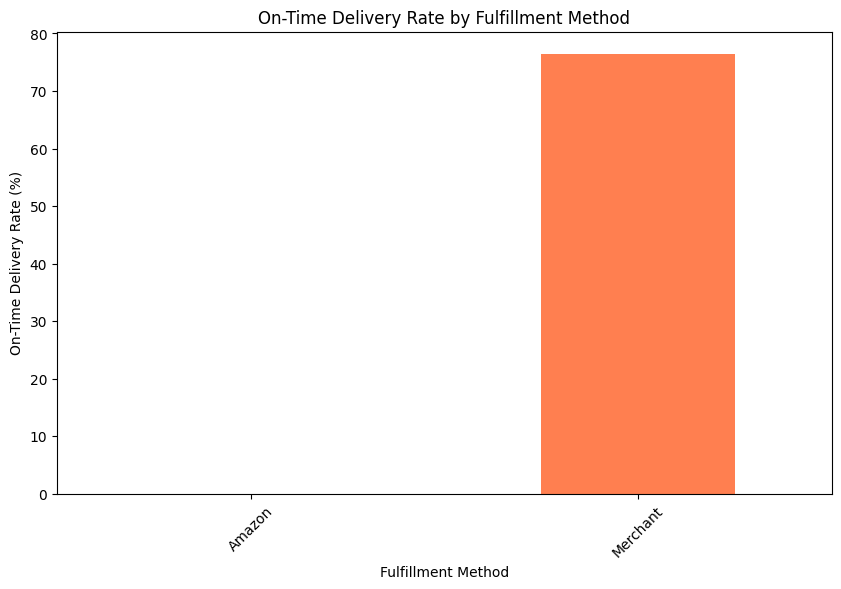

In [154]:
## plotting on time delivery rate by fulfilment method
plt.figure(figsize = (10,6))
on_time_delivery.plot(kind = 'bar', color = 'coral')
plt.title('On-Time Delivery Rate by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Insights and Observations
- Amazon has an on-time delivery rate of 0%, which might indicate no data available or a reporting issue for this channel.
- Merchant has a substantial on-time delivery rate of 76.48%, suggesting that this channel performs well in terms of timely deliveries.

- Order Sucess Rate

In [155]:
success_rate = df_copy[df_copy['order status'] == 'Delivered to Buyer'].groupby('Fulfilment')['Order ID'].count()/df_copy.groupby('Fulfilment')['Order ID'].count()*100

In [156]:
success_rate

Fulfilment
Amazon            NaN
Merchant    76.483992
Name: Order ID, dtype: float64

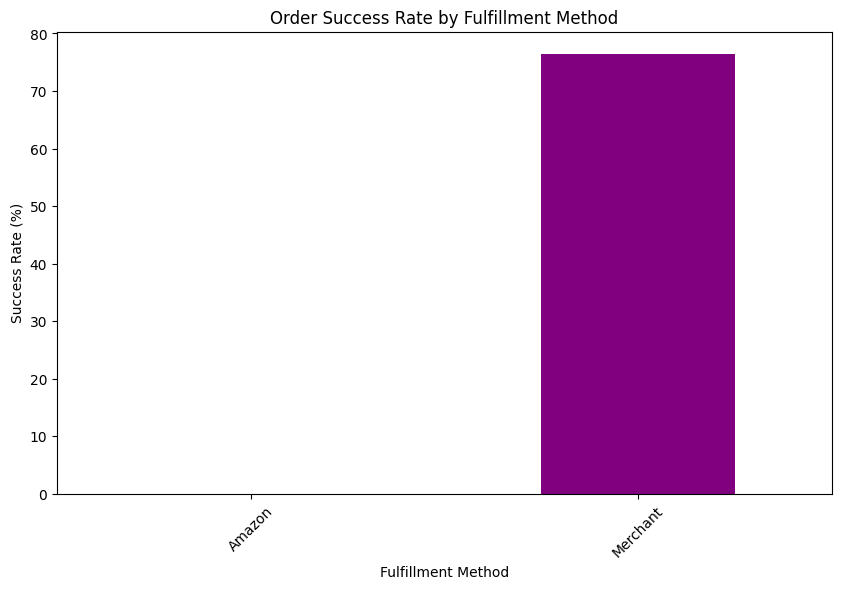

In [157]:
# Plotting order success rate by fulfillment method
plt.figure(figsize=(10, 6))
success_rate.plot(kind='bar', color='purple')
plt.title('Order Success Rate by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Insights and Observation
- Amazon: No data available for the number of orders fulfilled through Amazon, indicating either missing data or no orders recorded for this channel.
- Merchant: A total of 76.48 orders were fulfilled, though the fractional value suggests it might be an average or aggregate figure.

### Analyze Trends over Time

In [158]:
monthly_trends = df_copy.groupby([pd.Grouper(key = 'Date', freq = 'M'), 'Fulfilment'])['On Time Delivery'].mean().unstack()

In [159]:
monthly_trends

Fulfilment,Amazon,Merchant
Date,,
2022-03-31,0.0,0.695652
2022-04-30,0.0,0.796481
2022-05-31,0.0,0.810061
2022-06-30,0.0,0.656955


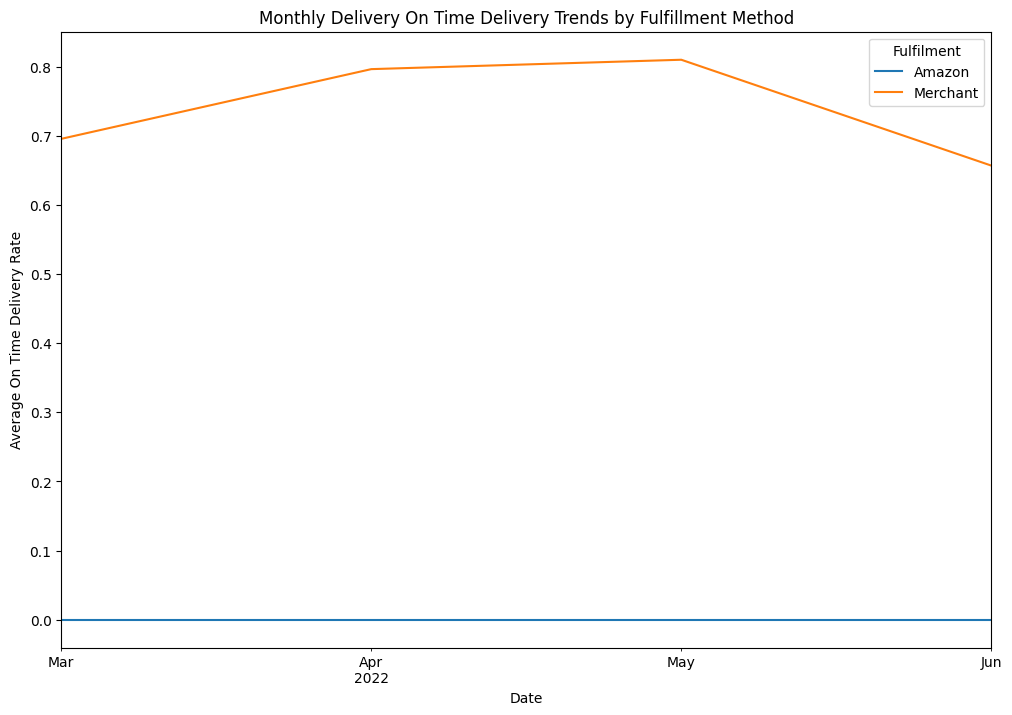

In [160]:
# Plotting the trends
monthly_trends.plot(kind='line', figsize=(12, 8))
plt.title('Monthly Delivery On Time Delivery Trends by Fulfillment Method')
plt.xlabel('Date')
plt.ylabel('Average On Time Delivery Rate')
plt.show()

## Insights and Observation
- Amazon shows a fulfillment rate of 0.0 across all dates, indicating either no data available, no orders fulfilled, or an issue with reporting for Amazon.
- Merchant shows varying fulfillment rates across the dates:
March 2022: 69.6%
April 2022: 79.6%
May 2022: 81.0%
June 2022: 65.7%
- Merchant’s fulfillment rates are relatively high, with a peak in May and a decrease in June.

### 4. Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities. 

- Aggregate Sales by State and City

In [161]:
df_copy['State'].unique()

array(['WEST BENGAL', 'UTTAR PRADESH', 'NEW DELHI', 'RAJASTHAN', 'KERALA',
       'TAMIL NADU', 'KARNATAKA', 'HARYANA', 'TELANGANA', 'MAHARASHTRA',
       'BIHAR', 'GUJARAT', 'TRIPURA', 'ANDHRA PRADESH', 'CHANDIGARH',
       'UTTARAKHAND', 'JHARKHAND', 'JAMMU & KASHMIR', 'ODISHA',
       'CHHATTISGARH', 'MADHYA PRADESH', 'GOA', 'ASSAM', 'PUNJAB',
       'HIMACHAL PRADESH', 'MEGHALAYA', 'MANIPUR', 'ANDAMAN & NICOBAR',
       'ARUNACHAL PRADESH', 'DADRA AND NAGAR', 'SIKKIM', 'PUDUCHERRY',
       'NAGALAND', 'MIZORAM', 'LADAKH', 'NA', 'LAKSHADWEEP', 'ORISSA',
       'PONDICHERRY'], dtype=object)

In [162]:
df_copy['State'] = df_copy['State'].replace('NA', 'NAGALAND')

In [163]:
## Aggregate Sales by state
sales_by_state = df_copy.groupby('State')['Total Sales'].sum().reset_index()

In [164]:
sales_by_state

,State,Total Sales
0,ANDAMAN & NICOBAR,138623.0
1,ANDHRA PRADESH,2803870.0
2,ARUNACHAL PRADESH,85415.0
3,ASSAM,944576.0
4,BIHAR,1299735.0
5,CHANDIGARH,190573.0
6,CHHATTISGARH,522418.0
7,DADRA AND NAGAR,34976.0
8,GOA,592715.0
9,GUJARAT,2432284.0


In [165]:
## Aggregate Sales by city 
sales_by_city = df_copy.groupby(['City'])['Total Sales'].sum().reset_index()

- Visualize Sales Distribution by State

<Figure size 1200x800 with 0 Axes>

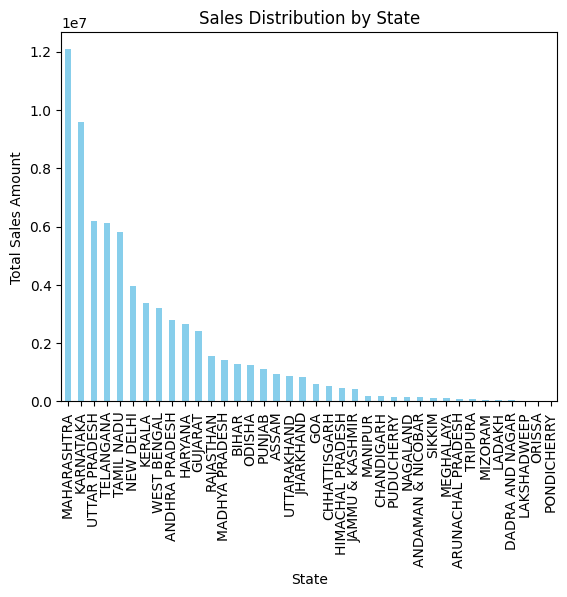

In [167]:
# Plotting sales distribution by state
plt.figure(figsize=(12,8))
sales_by_state.sort_values(by='Total Sales', ascending=False).plot(kind='bar', x='State', y='Total Sales', color='skyblue', legend=False)
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.show()

## Insights and Observations
- Maharashtra has the highest total sales with over 12 million.
- Karnataka, Telangana, Uttar Pradesh, and Tamil Nadu also have high sales figures, all above 5 million.
- Lakshadweep, Pondicherry, and Orissa have the lowest sales, with figures under 3,000.
- The Northern and Southern regions, particularly Maharashtra, Karnataka, and Tamil Nadu, dominate the sales distribution.

- Visualize Sales Distribution by City

<Figure size 1400x1000 with 0 Axes>

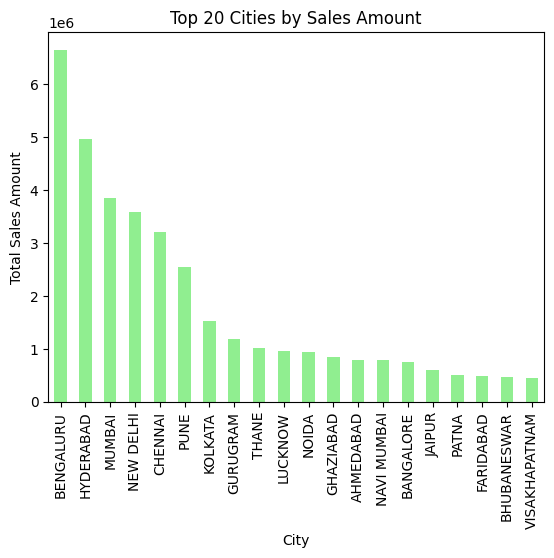

In [168]:
# Plotting sales distribution by city
plt.figure(figsize=(14, 10))
sales_by_city.sort_values(by='Total Sales', ascending=False).head(20).plot(kind='bar', x='City', y='Total Sales', color='lightgreen', legend=False)
plt.title('Top 20 Cities by Sales Amount')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.show()

- Comparing Sales Growth between cities or States

In [169]:
monthly_sales_by_state = df_copy.groupby([pd.Grouper(key='Date', freq='M'), 'State'])['Total Sales'].sum().unstack()

In [170]:
monthly_sales_by_state

State,ANDAMAN & NICOBAR,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DADRA AND NAGAR,GOA,GUJARAT,...,PUDUCHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TELANGANA,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,NaN,3621.0,NaN,NaN,4637.0,353.0,899.0,NaN,542.0,4249.0,...,NaN,NaN,1512.0,NaN,7852.0,4080.0,688.0,10979.0,1138.0,8412.0
2022-04-30,46739.0,961031.0,26857.0,403963.0,532406.0,66156.0,201330.0,14531.0,243995.0,884453.0,...,50272.0,442845.0,571963.0,43415.0,1945828.0,2006891.0,37078.0,2318771.0,363459.0,1320544.0
2022-05-31,42018.0,932833.0,31557.0,262681.0,397405.0,68548.0,178438.0,12938.0,181493.0,852642.0,...,53313.0,377628.0,530466.0,40712.0,2010990.0,2096519.0,22131.0,2131739.0,294884.0,1005996.0
2022-06-30,49866.0,906385.0,27001.0,277932.0,365287.0,55516.0,141751.0,7507.0,166685.0,690940.0,...,55931.0,306969.0,451290.0,45471.0,1842226.0,2026694.0,22882.0,1728399.0,227411.0,857973.0


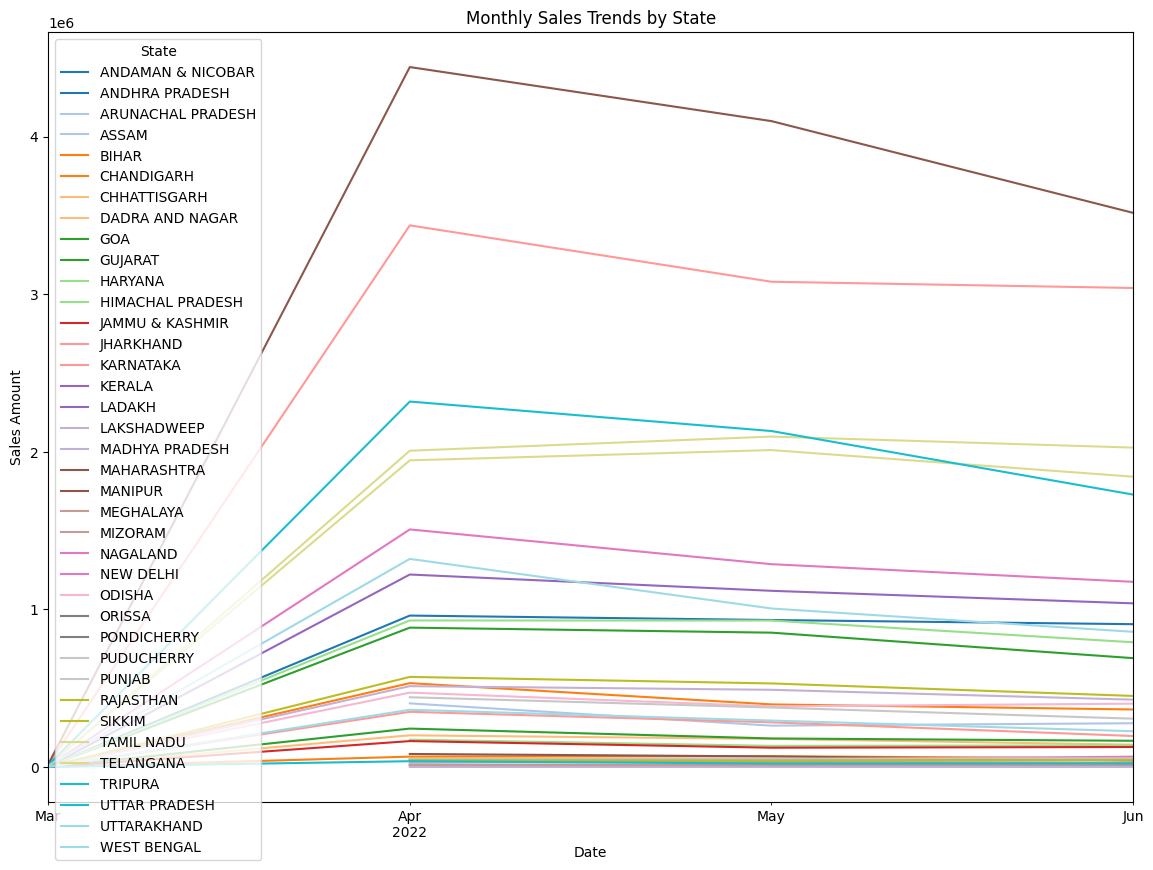

In [171]:
# Plotting the trends
monthly_sales_by_state.plot(kind='line', figsize=(14, 10), colormap='tab20')
plt.title('Monthly Sales Trends by State')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

## Insights and Observations:
- April month is the highest sales growth.

## Conclusion:
- The analysis of the Amazon sales transactions dataset provided valuable insights that can be used to support strategic decision-making, enhance operational efficiency, and drive business growth. Through data cleaning, exploratory data analysis, and data visualization, the report offers a comprehensive understanding of the sales performance and identifies key opportunities for improvement.